From https://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_ml/py_knn/py_knn_opencv/py_knn_opencv.html#knn-opencv

In [1]:
import cv2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# read in digits image (contains 5000 hand-written digits)
img = cv2.imread('/Users/benkaufman/repositories/opencv/samples/data/digits.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
# Now we split the image to 5000 cells, each 20x20 size
cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]

In [6]:
# Make it into a Numpy array. It size will be (50,100,20,20)
x = np.array(cells)

In [7]:
# Now we prepare train_data and test_data.
train = x[:,:50].reshape(-1,400).astype(np.float32) # Size = (2500,400)
test = x[:,50:100].reshape(-1,400).astype(np.float32) # Size = (2500,400)

In [8]:
# Create labels for train and test data
k = np.arange(10)  # digits (0-9) 
train_labels = np.repeat(k,250)[:,np.newaxis]  # 250 of each
test_labels = train_labels.copy()

In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# Initiate kNN, train the data, then test it with test data for k=1
# Not working with current version of opencv 3.0, tried installing it from contrib too...
knn = cv2.KNearest()
knn.train(train,train_labels)
ret,result,neighbours,dist = knn.find_nearest(test,k=5)

AttributeError: 'module' object has no attribute 'KNNearest'

In [18]:
# Use classifier from scikit-learn because of opencv problems
from sklearn.neighbors import KNeighborsClassifier

In [19]:
neigh = KNeighborsClassifier(n_neighbors=5)

In [20]:
# Create classifer
neigh.fit(train,train_labels)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')

In [21]:
neigh.score(test, test_labels)

0.91759999999999997

In [22]:
### Testing stuff down here
# First part finding text based off of thresholding, not gonna work

In [67]:
notecard = cv2.imread('/Users/benkaufman/Downloads/notecard.jpg')

In [68]:
graycard = cv2.cvtColor(notecard, cv2.COLOR_BGR2GRAY)
cv2.imwrite('data/graycard.jpg', graycard)

True

In [60]:
# can use laplacian smoothing as well
sobelcard = cv2.Sobel(graycard,cv2.CV_64F,1,0,ksize=5)
cv2.imwrite('data/sobelcard.jpg', sobelcard)

True

In [69]:
laplaciancard = cv2.Laplacian(graycard, cv2.CV_64F)
cv2.imwrite('data/lapaciancard.jpg', laplaciancard)

True

In [70]:
# thresholding (smooted image, (range), threshold type)
_,threshcard = cv2.threshold(np.array(laplaciancard, np.uint8),0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('data/threshcard.jpg', threshcard)

True

In [32]:
#structuredcard = cv2.getStructuringElement(cv2.MORPH_RECT)

True

In [71]:
# "close" image = dialation -> erosion
kernel = np.ones((5,5),np.uint8)
closedcard = cv2.morphologyEx(threshcard, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('data/closedcard.jpg', closedcard)

True

In [72]:
_, contours, hierarchy= cv2.findContours(closedcard,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(notecard,contours,-1,(0,255,0),3)
cv2.imwrite('data/boxedcard.jpg', notecard)

True

In [48]:
contours

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   2,   2, ...,   2, 130,   0],
       [  0,   2,   1, ...,   1, 130,   0],
       ..., 
       [  0,   2,   1, ...,   1, 130,   0],
       [  0,   2,   2, ...,   2, 130,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [55]:
notecard_copy = notecard.copy()
cv2.drawContours(notecard,contours,-1,(0,255,0),3)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       ..., 
       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ..., 
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,

In [73]:
### Extracting text with feature points

In [74]:
notecard = cv2.imread('/Users/benkaufman/Downloads/notecard.jpg')

In [75]:
graycard = cv2.cvtColor(notecard, cv2.COLOR_BGR2GRAY)

In [88]:
msercard = cv2.MSER_create()

In [89]:
mserkeypoints = msercard.detect(graycard,None)

In [91]:
#keypcard = cv2.drawKeypoints(notecard, mserkeypoints)
tempimg = np.zeros((1,1))
keypcard = cv2.drawKeypoints(notecard,mserkeypoints,tempimg,flags=2)

In [93]:
cv2.imwrite('data/keypointscard.jpg',keypcard)

True

In [95]:
# get edges
cannycard = cv2.Canny(graycard,100,200)
cv2.imwrite('data/cannycard.jpg',cannycard)

True

In [102]:
#cv2.imwrite('data/not.jpg',keypcard)

bitintcard = cv2.bitwise_and(cv2.cvtColor(keypcard, cv2.COLOR_RGB2GRAY), cannycard, cv2.COLOR_RGB2GRAY)
cv2.imwrite('data/bitint.jpg',bitintcard)

True

In [103]:
kernel = np.ones((5,5),np.uint8)
closedintcard = cv2.morphologyEx(bitintcard, cv2.MORPH_CLOSE, kernel)
cv2.imwrite('data/closedintcard.jpg', closedintcard)

True

In [104]:
from skimage import measure
import numpy as np

L = measure.label(closedintcard)
print "Number of components:", np.max(L)

Number of components: 16236


In [105]:
L

array([[    0,     0,     0, ...,    88,    88,    88],
       [    0,     0,     0, ...,    88,    88,    88],
       [    0,     0,     0, ...,    88,    88,    88],
       ..., 
       [15609, 15609, 15958, ...,    26, 16108, 16108],
       [15609, 15609, 15609, ...,    26, 16108, 16108],
       [15609, 15609, 15609, ...,    26, 16108, 16108]])

In [106]:
cv2.imwrite('data/cccard.jpg', L)

True

In [3]:
from skimage import io

In [108]:
infographic = io.imread('/Users/benkaufman/infographic/pos/10 Great Timeline Infographics | Infographic Design.jpg')

In [110]:
infographic[0][0]

array([255, 255, 255], dtype=uint8)

In [133]:
colorset = set()
for x in white:
    for y in x:
        colorset.add('{0}|{1}|{2}'.format(y[0],y[1],y[2]))

In [128]:
1000*2500

2500000

In [134]:
len(colorset)

1

In [131]:
white = io.imread('/Users/benkaufman/Downloads/white.png')

In [132]:
white.shape

(1333, 2000, 3)

In [3]:
def get_num_colors(img_path):
    colorset = set()
    img = io.imread(img_path) 
    smoothed = cv2.GaussianBlur(img,(5,5),0)
    for x in smoothed:
        for y in x:
            colorset.add('{0}|{1}|{2}'.format(y[0],y[1],y[2]))
    return len(colorset)

def get_grays(img_path):
    grayset = set()
    img = io.imread(img_path, as_grey=True) 
    smoothed = cv2.GaussianBlur(img,(5,5),0)
    for x in smoothed:
        for y in x:
            grayset.add(y)
    return len(grayset)

In [4]:
import os

In [10]:
posfeatures = []
path = '/Users/benkaufman/infographic/pos/'
for f in os.listdir(path):
    print f
    posfeatures.append(get_num_colors(path+f))

10 free tools for creating infographics | Infographic | Creative Bloq.jpg
10 Great Timeline Infographics | Infographic Design.jpg
1388769567-let-go-keep-simple- ....jpg
1388769585-let-go-keep-simple- ....jpg
1397168889-formula-startups- ....jpg
1420832715-focus-info.jpg.jpg
15 Free Infographic Design Kits (PSD, AI, and EPS Files ....jpg
15 Years of Google Search - Blog About Infographics and Data ....jpg
17 Beautiful Examples Of Clean And Minimal Infographics | Designbeep.jpg
17 Cool Infographic Design Templates iDesignow, simple ....jpg
18 Smoothie Recipes - The Infographics.jpg
20 Interesting Infographics on Design.jpg
3 Trends That Will Define The Future Of Infographics CoDesign ....jpg
3 Trends That Will Define The Future Of Infographics | Co.Design ....jpg
30 Useful Infographics for Designers &amp; Developers ~ Creative ....jpg
40 Infographic Vector Kits and Resources – Design Bump.jpg
45 Stunning Timeline Designs | Web &amp; Graphic Design | Bashooka.jpg
5 Cool Ways to Use Infogr

In [146]:
features

[18825,
 133330,
 16798,
 43838,
 55773,
 67797,
 21126,
 41742,
 15978,
 40770,
 48558,
 116882,
 8024,
 40394,
 120041,
 47084,
 13538,
 308265,
 56193,
 2332,
 163825,
 40267,
 49885,
 85721,
 33822,
 182709,
 40990,
 58510,
 56508,
 96629,
 53148,
 138324,
 22051,
 47577,
 30171,
 26175,
 283842,
 57516,
 34111,
 33383,
 119361,
 51267,
 96502,
 468961,
 31517,
 38652,
 117943,
 195847,
 28633,
 161987,
 26618,
 52556,
 53573,
 14582,
 129787,
 164341,
 100513,
 210806,
 81085,
 68508,
 13628,
 12506,
 8895,
 84371,
 92650,
 21655,
 16001,
 48512,
 181495,
 59783,
 60930,
 149710,
 29554,
 246058,
 68283,
 379254,
 76442,
 112046,
 75098,
 85223,
 161669,
 25620,
 86691,
 172303,
 61470,
 230011,
 61476,
 101785,
 63795,
 82821,
 21044,
 70602,
 95021,
 46517,
 132023,
 175844,
 26815,
 45192,
 61998,
 89535,
 67513,
 26658,
 2479,
 256664,
 77857,
 13362,
 196269,
 14957,
 54805,
 136368,
 121491,
 20946,
 30471,
 120070,
 37339,
 128603,
 21155,
 32761,
 142885,
 256847,
 62431,


1

In [11]:
npfeatures = np.array(posfeatures)

(array([ 71.,  39.,  21.,   8.,  10.,   3.,   0.,   0.,   1.,   1.]),
 array([   3082. ,   76986.8,  150891.6,  224796.4,  298701.2,  372606. ,
         446510.8,  520415.6,  594320.4,  668225.2,  742130. ]),
 <a list of 10 Patch objects>)

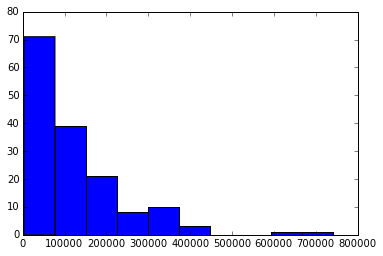

In [12]:
plt.hist(npfeatures)

In [157]:
negfeatures = []
pathneg = '/Users/benkaufman/infographic/neg/'
for f in os.listdir(pathneg):
    print f
    negfeatures.append(get_num_colors(pathneg+f))

0086da0d44dc576311d06b1d121c1884e6aac686.jpg
00fe813a109961e2c19ffb045d28bbd693e60126.jpg
01e9b0488462c39ef19d010c654880f26395b18d.jpg
02650b02209458dfb49b89d3c0716b19e9240579.jpg
02c01fba0f8008498179f3b159b91d87e9ed41a2.jpg
032d4cb67a6565b358dbfd2df9f6174b2908aec8.jpg
04139a49147c940caa702b4fb6a81b3380726b5d.jpg
0430ca7907cd563f42268b077a115a15d60a9093.jpg
04840502d7b4bb67d3de9d95578ac74b969b9da7.jpg
053e99870642a99022c224d8ca040506ed24598d.jpg
057b8d0ad7d08141fe9b3cfa245c64c02c64857d.jpg
0600343e2fd7643c045b8c6428befb1b0136c797.jpg
06b210000095da7fc0b5f73b6856d0ff7412e03b.jpg
0824247ddb89cee09acaa437a4169c0007c1327a.jpg
0967fe4550b1a7a09a4a4fb12a07c66ebc11d729.jpg
0989548f3bf3c5b9ceda0e0781a1971588316ca2.jpg
09ea9525aaa68074f00618e913a7921ec0286514.jpg
0b5dd757770ff642fd771d34d34a895d2493e260.jpg
0b8c716fa160d450cc6cd044119783c1c6f771f0.jpg
0f127dcbf78362b7d96c82c4b115dfc28edf86d2.jpg
121515df22eee6763386ed79503de682079b7e61.jpg
12326de26df1600935c5e2ca60b209e4e1ab99ae.jpg
12bbe1c652

In [158]:
npnegfeatures = np.array(negfeatures)

(array([ 28.,  50.,  72.,  58.,  49.,  20.,   9.,   6.,   4.,   1.]),
 array([    242. ,   13129.5,   26017. ,   38904.5,   51792. ,   64679.5,
          77567. ,   90454.5,  103342. ,  116229.5,  129117. ]),
 <a list of 10 Patch objects>)

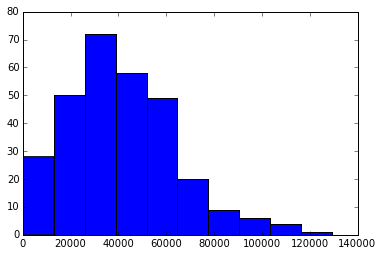

In [159]:
plt.hist(npnegfeatures)

In [160]:
np.repeat(0,len(negfeatures))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [161]:
from sklearn import svm

In [162]:
#clf = svm.SVC()

In [163]:
len(features)

154

In [164]:
len(negfeatures)

297

In [165]:
all_features = features+negfeatures

In [167]:
all_labels = list(np.repeat(1, len(features))) + list(np.repeat(0,len(negfeatures)))

In [169]:
clf = svm.SVC()

In [172]:
clf.fit(tfeatures, all_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [171]:
tfeatures = [[x] for x in all_features]

In [175]:
clf.predict([get_num_colors('/Users/benkaufman/Downloads/infographic.jpg')])

array([0])

In [177]:
from scipy import stats

In [178]:
stats.describe(npfeatures)

(154,
 (2332, 468961),
 90972.019480519477,
 6165553200.1760893,
 1.6910753066516477,
 3.6522057884938555)

In [179]:
import pandas as pd

In [180]:
pos = pd.Series(features)

In [181]:
pos.describe()

count       154.000000
mean      90972.019481
std       78521.036673
min        2332.000000
25%       34507.750000
50%       61756.500000
75%      121135.750000
max      468961.000000
dtype: float64

In [182]:
neg = pd.Series(negfeatures)

In [183]:
neg.describe()

count       297.000000
mean      41189.350168
std       23134.118419
min         242.000000
25%       25372.000000
50%       38281.000000
75%       54919.000000
max      129117.000000
dtype: float64

In [184]:
img = io.imread('/Users/benkaufman/Downloads/infographic.jpg')

In [204]:
counts2 = {}
blurred = cv2.GaussianBlur(img,(5,5),0)
for x in blurred: 
    for y in x:
        pix = '{0}|{1}|{2}'.format(y[0],y[1],y[2])
        if pix not in counts2.keys():
            counts2[pix] = 1
        else:
            counts2[pix] += 1

In [194]:
import operator
dict(sorted(counts.iteritems(), key=operator.itemgetter(1), reverse=True))

{'244|123|34': 1,
 '8|188|223': 1,
 '8|188|225': 2,
 '61|79|93': 1,
 '175|174|180': 2,
 '115|203|243': 1,
 '202|226|228': 1,
 '41|64|78': 1,
 '79|186|242': 1,
 '21|184|225': 1,
 '213|239|254': 1,
 '66|200|211': 1,
 '43|71|95': 1,
 '243|244|239': 6,
 '243|244|238': 2,
 '221|252|254': 1,
 '229|249|255': 2,
 '29|173|184': 1,
 '61|79|91': 2,
 '59|195|219': 1,
 '2|187|218': 2,
 '116|224|224': 1,
 '217|237|238': 1,
 '233|250|255': 4,
 '14|179|207': 90,
 '63|197|222': 1,
 '1|191|215': 1,
 '48|186|199': 1,
 '134|135|137': 2,
 '77|99|113': 1,
 '119|217|228': 1,
 '156|215|231': 1,
 '62|84|97': 1,
 '255|249|242': 1,
 '195|207|205': 1,
 '82|191|230': 1,
 '255|249|243': 10,
 '128|218|218': 1,
 '255|235|196': 1,
 '121|210|216': 1,
 '249|128|37': 14,
 '196|237|243': 1,
 '249|128|35': 20,
 '41|171|193': 1,
 '71|189|203': 1,
 '255|249|241': 14,
 '76|193|213': 2,
 '53|208|230': 1,
 '37|175|221': 1,
 '168|229|248': 1,
 '255|254|239': 7,
 '252|251|249': 96,
 '252|251|246': 11,
 '252|251|247': 49,
 '128|21

In [193]:
%%sh open /Users/benkaufman/Downloads/infographic.jpg

UsageError: %%sh is a cell magic, but the cell body is empty.

In [195]:
keys = []
values = []
for key, value in counts.items():
    keys.append(key)
    values.append(value)

In [197]:
sorted(values, reverse=True)

[94074,
 33141,
 20795,
 19838,
 17229,
 17100,
 15679,
 15481,
 14312,
 14012,
 13806,
 11759,
 10547,
 10037,
 9294,
 9081,
 8442,
 7568,
 7264,
 6618,
 6517,
 5914,
 5884,
 5815,
 5727,
 5693,
 5634,
 5490,
 5296,
 5261,
 4988,
 4907,
 4865,
 4844,
 4747,
 4738,
 4609,
 4135,
 4094,
 4078,
 3735,
 3523,
 3201,
 3051,
 2924,
 2878,
 2651,
 2638,
 2440,
 2426,
 2268,
 2264,
 2173,
 2023,
 1995,
 1913,
 1696,
 1586,
 1277,
 1274,
 1268,
 1216,
 1079,
 1050,
 909,
 796,
 582,
 580,
 487,
 475,
 464,
 448,
 444,
 444,
 442,
 405,
 394,
 384,
 382,
 381,
 381,
 376,
 373,
 357,
 355,
 350,
 320,
 305,
 296,
 295,
 286,
 285,
 284,
 278,
 274,
 273,
 268,
 256,
 252,
 251,
 251,
 250,
 249,
 248,
 248,
 246,
 243,
 241,
 235,
 234,
 234,
 230,
 229,
 227,
 226,
 226,
 224,
 223,
 220,
 218,
 218,
 214,
 213,
 212,
 211,
 209,
 206,
 205,
 205,
 205,
 203,
 202,
 201,
 200,
 200,
 198,
 197,
 196,
 196,
 194,
 194,
 192,
 192,
 191,
 190,
 190,
 190,
 189,
 189,
 187,
 187,
 185,
 184,
 184

In [198]:
import matplotlib

In [200]:
matplotlib.colors.rgb2hex([191,229,250])

u'#be41e41bf906'

In [201]:
items = sorted(((v, k) for k, v in counts.items()), reverse=True)

In [202]:
items

[(94074, '255|255|255'),
 (33141, '254|254|254'),
 (20795, '251|251|251'),
 (19838, '248|248|248'),
 (17229, '252|252|252'),
 (17100, '246|128|38'),
 (15679, '253|253|253'),
 (15481, '17|177|209'),
 (14312, '249|249|249'),
 (14012, '206|204|205'),
 (13806, '245|245|245'),
 (11759, '247|247|247'),
 (10547, '246|246|246'),
 (10037, '244|244|244'),
 (9294, '243|243|243'),
 (9081, '238|238|238'),
 (8442, '235|235|235'),
 (7568, '241|241|241'),
 (7264, '242|242|242'),
 (6618, '231|231|231'),
 (6517, '234|234|234'),
 (5914, '249|249|251'),
 (5884, '250|250|250'),
 (5815, '236|236|236'),
 (5727, '240|240|240'),
 (5693, '239|239|239'),
 (5634, '254|252|253'),
 (5490, '179|199|200'),
 (5296, '230|230|230'),
 (5261, '237|237|237'),
 (4988, '233|233|233'),
 (4907, '224|224|224'),
 (4865, '51|73|87'),
 (4844, '0|0|0'),
 (4747, '227|227|227'),
 (4738, '232|232|232'),
 (4609, '228|228|228'),
 (4135, '226|226|226'),
 (4094, '225|225|225'),
 (4078, '229|229|229'),
 (3735, '223|223|223'),
 (3523, '221|

In [15]:
grayposfeatures = []
graydict = {}
path = '/Users/benkaufman/infographic/pos/'
for f in os.listdir(path):
    gray_nums = get_grays(path+f)
    grayposfeatures.append(gray_nums)
    graydict[f] = gray_nums
print graydict

{'ios-version-visual-timeline- ....jpg': 340358, 'Infographic: The Facts Behind Food Prices - CME Group.jpg': 4243045, 'Gay Anthems Timeline | Visual.ly.jpg': 588374, 'How to Create a Popular Infographic - EverydayHowTo.net.jpg': 94814, 'ginormous.jpg.jpg': 796520, 'iphone-evolution-timeline- ....jpg': 1127146, 'Snakebites in Family Pets [Infographic] | Daily Infographic.jpg': 2291929, 'The Apple Timeline | Visual.ly.jpg': 575033, 'Simple Innovations Help African Farmers Thrive | Visual.ly.jpg': 784294, 'Infographic: What do happy consumers do? | Lean back.jpg': 354011, 'INFOGRAPHICS | America&#39;s Byways Timeline Poster.jpg': 236092, 'Timeline Infographic Business Template Vector Royalty Free Stock ....jpg': 161203, 'Picasso Biography Timeline - iNFOGRAPHiCs MANiA.jpg': 524390, 'us__en_us__water__water_ ....jpg': 537833, 'Sweet and Simple Infographics | GraphicRiver.jpg': 309890, 'Timeline of Usability Infographic: MeasuringU.jpg': 1359628, 'Infographic: The Facts Behind Oil Prices -

In [11]:
temp = np.array(grayposfeatures)

(array([ 95.,  29.,  12.,   8.,   4.,   3.,   0.,   0.,   1.,   2.]),
 array([   33582. ,   454528.3,   875474.6,  1296420.9,  1717367.2,
         2138313.5,  2559259.8,  2980206.1,  3401152.4,  3822098.7,
         4243045. ]),
 <a list of 10 Patch objects>)

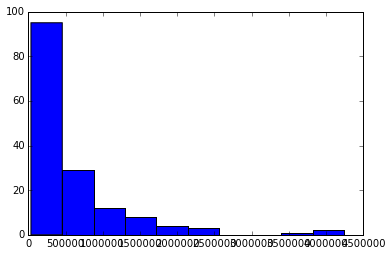

In [12]:
plt.hist(temp)

In [14]:
sorted(grayposfeatures)

[33582,
 37428,
 39835,
 44030,
 50987,
 52325,
 52832,
 54388,
 55032,
 55068,
 57459,
 57885,
 59608,
 62290,
 64070,
 66579,
 69087,
 73260,
 77724,
 79969,
 80161,
 84284,
 86955,
 90522,
 90664,
 90881,
 91999,
 94814,
 98348,
 101256,
 110412,
 116570,
 119223,
 124570,
 130085,
 130866,
 132588,
 134448,
 137300,
 139175,
 140199,
 152419,
 158633,
 160870,
 161203,
 169368,
 171129,
 178725,
 179366,
 187310,
 188143,
 189261,
 197887,
 200735,
 209715,
 210220,
 219495,
 236092,
 239350,
 252188,
 256334,
 258505,
 259328,
 260142,
 262197,
 263392,
 263674,
 265272,
 268779,
 271878,
 277521,
 285677,
 291485,
 294390,
 294962,
 300749,
 309890,
 320304,
 321536,
 330396,
 336910,
 340358,
 345397,
 351539,
 351901,
 354011,
 373599,
 391821,
 395475,
 395601,
 425735,
 427842,
 431236,
 442159,
 453319,
 463016,
 465458,
 473350,
 490026,
 493054,
 522772,
 524390,
 537833,
 575033,
 578988,
 585750,
 588374,
 597779,
 672893,
 683791,
 693876,
 716173,
 740020,
 742205,
 75

In [109]:
temp = cv2.imread('/Users/benkaufman/infographic/pos/Infographic Vectors, Photos and PSD files | Free Download.jpg')
#temp = cv2.imread('/Users/benkaufman/infographic/neg/02650b02209458dfb49b89d3c0716b19e9240579.jpg')

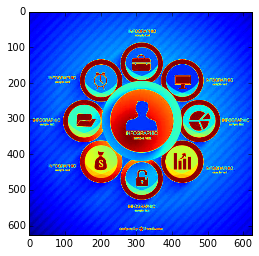

In [111]:
plt.imshow(temp3)

In [110]:
temp2 = cv2.cvtColor(temp, cv2.COLOR_RGB2BGR);
temp3 = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY);



In [7]:
temp3[0][0]

222

In [39]:
myset = set()
for x in temp3:
    for y in x:
        myset.add(y)

In [40]:
myset

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [115]:
# make min-radius, max, distance between circles (param4) propotional to image size
circles = cv2.HoughCircles(temp3, cv2.HOUGH_GRADIENT, 1, 100, param1=200,param2=100,minRadius=50,maxRadius=250)

In [116]:
circles

array([[[ 313.5       ,  306.5       ,  112.74972534],
        [ 200.5       ,  193.5       ,   59.43483734]]], dtype=float32)

In [117]:
for i in circles[0,:]:
    cv2.circle(temp3,(i[0],i[1]),i[2],(0,255,0),2)
    cv2.circle(temp3,(i[0],i[1]),2,(0,0,255),3)

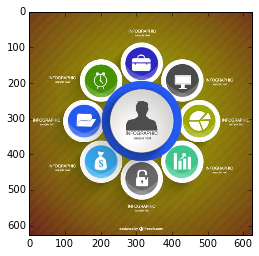

In [121]:
plt.imshow(temp)

In [126]:
cv2.imwrite('data/test.jpg',temp3)

True

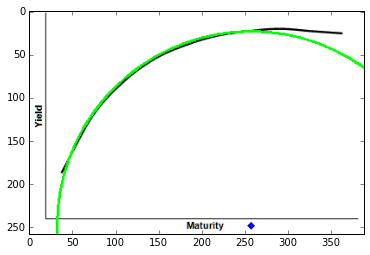

In [71]:
# pos, has circles
#temp = cv2.imread('/Users/benkaufman/infographic/pos/Infographic Vectors, Photos and PSD files | Free Download.jpg')

# neg, does not have circles
#temp = cv2.imread('/Users/benkaufman/infographic/neg/1ada587a213ae922d2cb230a8d1ab8f59464e4ed.jpg')
temp = cv2.imread('/Users/benkaufman/Downloads/curvw.png')
plt.imshow(temp)

#temp = cv2.imread('/Users/benkaufman/Downloads/square.jpg')
temp2 = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY);

# make min-radius, max, distance between circles (param4) propotional to image size
circles = cv2.HoughCircles(temp2, cv2.HOUGH_GRADIENT, 1, 100, param1=50,param2=30,minRadius=30,maxRadius=250)

# draw circles
if circles is not None:
    for i in circles[0,:]:
        cv2.circle(temp,(i[0],i[1]),i[2],(0,255,0),2)
        cv2.circle(temp,(i[0],i[1]),2,(0,0,255),3)
    
plt.imshow(temp)


In [124]:
#cv2.goodFeaturesToTrack(temp3, 1000, .01, 10)

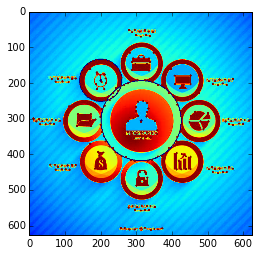

In [125]:
corners = cv2.goodFeaturesToTrack(temp3,1000,0.01,10)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(temp3,(x,y),3,255,-1)
plt.imshow(temp3)


In [127]:
len(corners)

256

In [128]:
from scipy.signal import correlate2d

In [ ]:
import numpy
from scipy import signal

data_length = temp.shape[0]*temp.shape[1]
a = temp.reshape((len(temp3),-1))
b = temp.reshape((len(temp3),-1))
#a = numpy.random.randn(data_length)
#b = numpy.zeros(data_length * 2)

b[data_length/2:data_length/2+data_length] = a # This works for data_length being even

# Do an array flipped convolution, which is a correlation.
c = signal.fftconvolve(b, a[::-1], mode='valid') 
print c
# Use numpy.correlate for comparison
#d = numpy.correlate(a, a, mode='same')

# c will be exactly the same as d, except for the last sample (which 
# completes the symmetry)
#numpy.allclose(c[:-1], d) # Should be True

In [130]:
temp.shape

(626, 626, 3)

In [133]:
temp3.shape

(626, 626)